## Hough Transform From Scratch

In [2]:
import cv2
import numpy as np
import os
import math
import matplotlib.pyplot as plt

### Read the Image

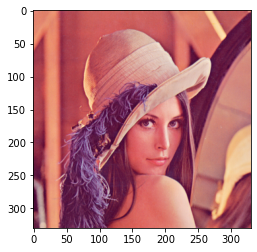

In [3]:
%matplotlib inline
img = cv2.imread ( os.path.join ( "images" , "lena.png" ) )
plt.imshow ( cv2.cvtColor ( img , cv2.COLOR_BGR2RGB ) )

### Convert Image to Grayscale

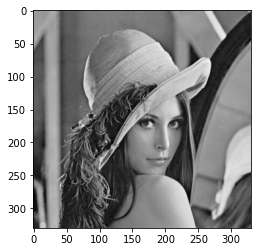

In [4]:
imgGray = cv2.cvtColor ( img , cv2.COLOR_BGR2GRAY )
plt.imshow ( imgGray , cmap = "gray" )

#### Run Canny Edge Detector on the Grayscale Image

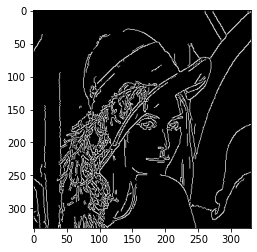

In [5]:
imgCanny = cv2.Canny ( imgGray , 100 , 200 )
plt.imshow ( imgCanny , cmap = "gray" )

#### Find the Points From Canny Edge Detector

In [6]:
row , col = img.shape [ : 2 ]
print ( row , col )
points = []

for i in range ( 0 , row ) :
    for j in range ( 0 , col ) :
        # print(imgCanny[i][j])
        if imgCanny [ i ] [ j ] == 255 :
            points.append ( ( i , j ) )
            
#for point in points:
#    print(str(point[0]) + " " + str(point[1]))

330 330


In [7]:
def line ( x1 , y1 , theta ) :
    return ( x1 ) * math.cos ( theta * ( math.pi / 180 ) ) + y1 * math.sin ( theta * ( math.pi / 180 ) )

### Make a Hough Accumulator

In [40]:
houghRow = math.floor ( max ( row , col ) + 1 )
houghCol = 361

gridSize = 2
houghAccumulator = np.zeros ( ( math.floor ( houghRow/gridSize ) + 1 , math.floor ( houghCol/gridSize ) + 1 ) )

for point in points :
    for theta in range ( 0 , 360 ) :
        x1 = point [ 0 ]
        y1 = point [ 1 ]
        
        ro = line ( point [ 0 ] , point [ 1 ] , theta )
        
        if ro < max ( row , col ) and ro >= 0 :
            houghAccumulator [ math.floor ( ro/gridSize ) ] [ math.floor ( theta/gridSize ) ] += 1

### View the Hough Accumulator

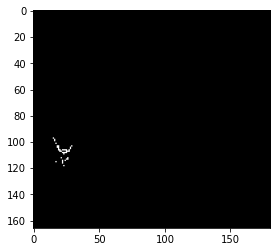

In [45]:
xmax, xmin = houghAccumulator.max (), houghAccumulator.min ()
houghAccumulatorNormalized = ( houghAccumulator - xmin )/( xmax - xmin )

ret , thresh1 = cv2.threshold ( houghAccumulatorNormalized , 0.8 , 1 , cv2.THRESH_BINARY ) # Get value of Hough Accumulator According to a threshhold
plt.imshow ( thresh1 , cmap = 'gray' )
plt.imshow ( houghAccumulatorNormalized , cmap = 'gray' )

In [52]:
#def getPoints ( d, theta ) :
#    return ( ( 0, math.floor ( d/math.sin (theta) ) ), ( 1, math.floor ( ( d - math.cos ( theta ) )/math.sin (theta) ) ) )

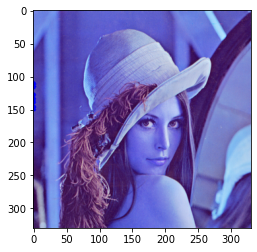

In [60]:
'''
finalPoints = []
finalRow, finalCol = img.shape [ : 2 ]

for i in range ( 0, 150 ) :
    for j in range ( 0, 150 ) :
        #finalPoints.append ( ( thresh1 [ i ][ j ] ) )
        try :
            if thresh1 [ i ][ j ] > 0 :
                startPoint, endPoint = getPoints ( i, j )
                img = cv2.line ( img, startPoint, endPoint, ( 0, 0, 255 ), 5 )
        except :
            pass

plt.imshow ( img )
'''